##Importing required Libraries

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 

Using TensorFlow backend.


In [0]:
!pip install h5py

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Methods

### Predict Class: Method that returns class of the image predicted by the model

In [0]:
def predict_class(image, model):
  '''
  image 4D
  '''

  y_pred = model.predict(image)

  # argmax returns the max value in the array
  class_idx = np.argmax(y_pred[0])
  print('predicted class: ', class_idx)
  return class_idx

### Get Convolution Layer Output value

In [0]:
def get_conv_layer_output_value(trained_model, class_output, conv_layer, img_four_dim):
  grads = K.gradients(class_output, conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([trained_model.input], [pooled_grads, conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img_four_dim])
  for i in range(512):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  return conv_layer_output_value

### Get Heatmap

In [0]:
def get_heatmap(conv_layer_output_value, axis=1):
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  return heatmap

### Convert nparray to PNG

In [0]:
import cv2

from keras.preprocessing import image
from google.colab.patches import cv2_imshow


def convert_to_png(image_3dim):
  '''
  accepts 3D image
  '''
  converted_img = image.image.array_to_img(image_3dim)
  converted_img.save('gdrive/My Drive/Colab Notebooks/Session9/test1.png')
  loaded_img = cv2.imread('gdrive/My Drive/Colab Notebooks/Session9/test1.png')
  return loaded_img

### Display Image with HeatSigns

In [0]:
def display_img(image, heatmap):
  '''
  accepts png
  '''
  
  heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  superimposed_img = cv2.addWeighted(image, 0.5, heatmap, 0.5, 0)
  
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
  plt.imshow(image)
  plt.show()
  plt.imshow(superimposed_img)
  ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])

  plt.show()

### Wrapper of all the methods - display_test_img_with_heat_signs

In [0]:
def display_test_img_with_heat_signs(test_img, preprocessed_img, trained_model, conv_layer, class_idx):
  """
  preprocessed_img: 4 dimensional image, with batch size (as model is trained in batches)
  
  """
  class_output = trained_model.output[:, class_idx]
  conv_layer_output_value = get_conv_layer_output_value(trained_model, class_output, conv_layer, preprocessed_img)
  
  heatmap = get_heatmap(conv_layer_output_value)
  
  png_img = convert_to_png(test_img)
  
  display_img(png_img, heatmap)

### Get Image From URL

In [0]:
import io as lib_io
import urllib.request
from PIL import Image


def get_img_from_url(url):
  req = urllib.request.Request(
    url, 
    data=None, 
    headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    }
    )

  f = urllib.request.urlopen(req)
  bytes1 = bytearray(f.read())

  img = Image.open(lib_io.BytesIO(bytes1))
  print(type(img))

  img.save('gdrive/My Drive/Colab Notebooks/Session10/temp.png')
  img_from_drive = cv2.imread('gdrive/My Drive/Colab Notebooks/Session10/temp.png')
  return img_from_drive
  
  

### Preprocess Image for VGG

In [0]:
from keras.preprocessing import image

def preprocess_img_for_vgg(img):
  img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  return img, x

## Assignment

### Load VGG

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
# import numpy as np
import cv2

model = model = VGG16(weights="imagenet")
model.summary()

img = None
preprocessed_img = None
im_four_dim = None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### Assignment 1A

W0710 16:29:50.953186 140616209045376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 16:29:50.977454 140616209045376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 16:29:50.981806 140616209045376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 16:29:51.015626 140616209045376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0710 16:29:52.885239 140616209045376 deprecation_wrapp

<class 'PIL.PngImagePlugin.PngImageFile'>
predicted class:  814
************ GRADCAM WITH MODEL LAYER block5_conv3 ************


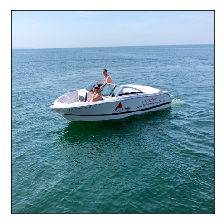

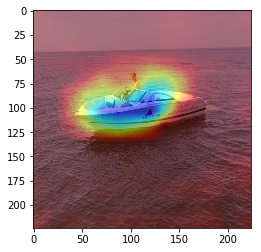

************ GRADCAM WITH MODEL LAYER block5_conv2 ************


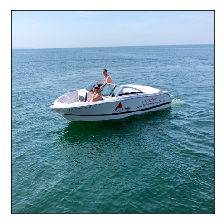

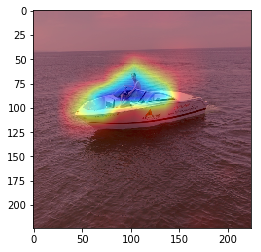

************ GRADCAM WITH MODEL LAYER block5_conv1 ************


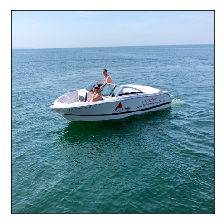

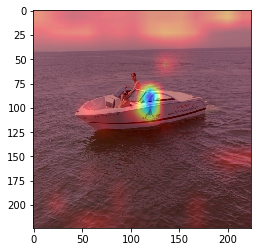

In [0]:
url = 'http://1adventurecompany.com/wp-content/uploads/2018/04/Screen-Shot-2018-06-07-at-2.10.50-PM.png'
img = get_img_from_url(url)

img, preprocessed_img = preprocess_img_for_vgg(img)

predicted_class_idx = predict_class(preprocessed_img, model)

print('************ GRADCAM WITH MODEL LAYER block5_conv3 ************')
conv_layer = model.get_layer('block5_conv3')
display_test_img_with_heat_signs(img, preprocessed_img, model, conv_layer, predicted_class_idx)

print('************ GRADCAM WITH MODEL LAYER block5_conv2 ************')
conv_layer = model.get_layer('block5_conv2')
display_test_img_with_heat_signs(img, preprocessed_img, model, conv_layer, predicted_class_idx)

print('************ GRADCAM WITH MODEL LAYER block5_conv1 ************')
conv_layer = model.get_layer('block5_conv1')
display_test_img_with_heat_signs(img, preprocessed_img, model, conv_layer, predicted_class_idx)

### Assignment 1B

<class 'PIL.JpegImagePlugin.JpegImageFile'>


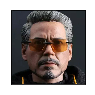

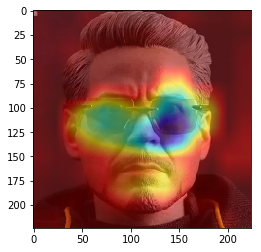

In [0]:
url = 'http://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg'
img = get_img_from_url(url)

img, preprocessed_img = preprocess_img_for_vgg(img)

# Class index for sunglasses in VGG is 836
predicted_class_idx = 836

conv_layer = model.get_layer('block5_conv3')

display_test_img_with_heat_signs(img, preprocessed_img, model, conv_layer, predicted_class_idx)